<div class="alert alert-block alert-warning">

# Visualization and Descriptive Statistics

In [1]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy
import pandas 

In [3]:
import statsmodels.api as sm
co2 = sm.datasets.co2

In [4]:
print(co2.DESCRLONG)


Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

Period of Record: March 1958 - December 2001

Methods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.


In [5]:
print(co2.NOTE)

::

    Number of observations: 2225
    Number of variables: 2
    Variable name definitions:

        date - sample date in YYMMDD format
        co2 - CO2 Concentration ppmv

    The data returned by load_pandas contains the dates as the index.



In [6]:
dataset_co2 = co2.load_pandas()

<div class="alert alert-block alert-info">

## What are the two variables that the data is reading?
### The first variable is the year that the data was taking place and the amount of co2


In [7]:
df_co2 = dataset_co2.data
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


<div class ="alert alert-block alert-info">
    
## How has the the amount of co2 changed from the 1950s to the early 2000s?
### The weekly co2 average has been increasing steadily
  

In [8]:
sm.datasets.co2.load_pandas().data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [9]:
df_co2.shape

(2284, 1)

In [10]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


<div class="aler aler-block alert-info">
    
## What is the average amount of co2?
### The average is about 340
    

In [11]:
df_co2.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [12]:
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending = False)/df_co2.shape[0]

co2    0.025832
dtype: float64

<div class="alert alert-block alert-info">
    
# Relationship between variables

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import date
co2 = sm.datasets.co2

In [14]:
dataset_co2 =  co2.load_pandas()

In [15]:
df_co2 = dataset_co2.data
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [16]:
df_co2['recordeddate']= df_co2.index

In [17]:
df_co2['Year'] = df_co2['recordeddate'].dt.year

In [18]:
df_co2['Month'] = df_co2['recordeddate'].dt.month

In [19]:
df_co2['Day'] = df_co2['recordeddate'].dt.dayofweek

In [20]:
df_co2.head()

,co2,recordeddate,Year,Month,Day
1958-03-29,316.1,1958-03-29,1958,3,5
1958-04-05,317.3,1958-04-05,1958,4,5
1958-04-12,317.6,1958-04-12,1958,4,5
1958-04-19,317.5,1958-04-19,1958,4,5
1958-04-26,316.4,1958-04-26,1958,4,5


In [21]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
 2   Year          2284 non-null   int64         
 3   Month         2284 non-null   int64         
 4   Day           2284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 107.1 KB


In [22]:
df_co2.columns

Index(['co2', 'recordeddate', 'Year', 'Month', 'Day'], dtype='object')

Text(0.5, 1.0, 'Rate of CO2 from 1960-2001')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'CO2')

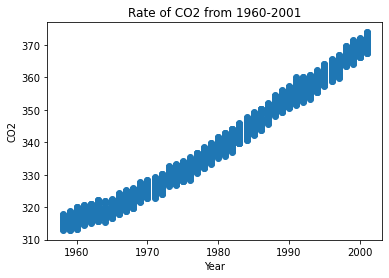

In [23]:
plt.scatter(df_co2['Year'], df_co2['co2'])
plt.title("Rate of CO2 from 1960-2001")
plt.xlabel("Year")
plt.ylabel("CO2")

<div class="alert alert-block alert-info">

# Hypothesis

# Rate of CO2 have been steadily increasing over time

array([[<AxesSubplot:title={'center':'co2'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>]],
      dtype=object)

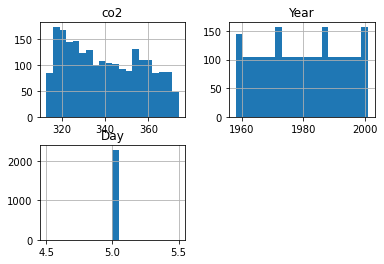

In [24]:
df_co2[['co2', 'Year','Day']].hist(bins=20)

Text(0.5, 0, 'CO2')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Rate of CO2')

(0.0, 240.0)

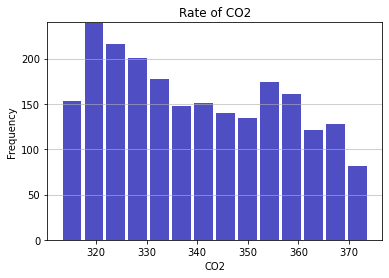

In [25]:
n, bins, patches = plt.hist(x=df_co2[['co2']], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.title('Rate of CO2')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


<div class="alert alert-block alert-info">
    
# Trends

<AxesSubplot:title={'center':'Year'}, xlabel='[co2]'>

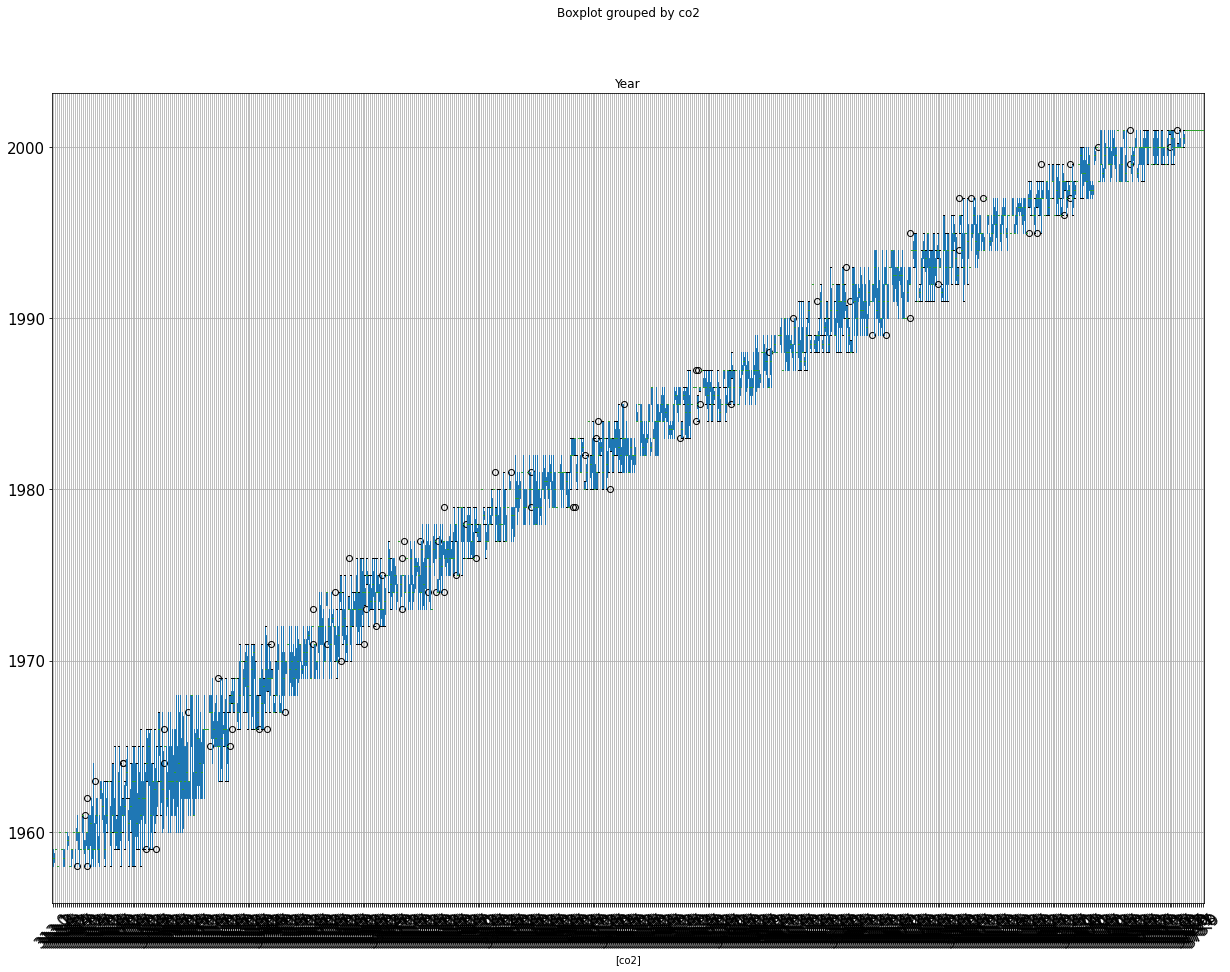

In [26]:
df_co2[['Year','co2']].boxplot(column=['Year'], by=['co2'], rot=45, fontsize=15, figsize=(20,15))

<div class="alert alert-block alert-info">

# Hypothesis

# Trend is that the rate of co2 in atmosphere have been increasing and the graph shows no signs of decreasing. 

<div class="alert alert-block alert-info">

# Hypothesis

# Data have been recorded only on Saturdays in order for data to be consistent.

<div class="alert alert-block alert-warning">

# Data Analysis 1

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import date
co2 = sm.datasets.co2

In [28]:
dataset_co2 =  co2.load_pandas()

In [29]:
df_co2 = dataset_co2.data
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [30]:
df_co2['recordeddate']= df_co2.index

In [31]:
df_co2['Year'] = df_co2['recordeddate'].dt.year
df_co2['Month'] = df_co2['recordeddate'].dt.month
df_co2['Day'] = df_co2['recordeddate'].dt.dayofweek

In [32]:
df_co2.head()

,co2,recordeddate,Year,Month,Day
1958-03-29,316.1,1958-03-29,1958,3,5
1958-04-05,317.3,1958-04-05,1958,4,5
1958-04-12,317.6,1958-04-12,1958,4,5
1958-04-19,317.5,1958-04-19,1958,4,5
1958-04-26,316.4,1958-04-26,1958,4,5


In [33]:
df_co2.columns

Index(['co2', 'recordeddate', 'Year', 'Month', 'Day'], dtype='object')

In [34]:
numericfeatures = [f for f in df_co2.columns if df_co2.dtypes[f] != 'object']
print("Number of Numerical Features: ", len(numericfeatures))

categoricalfeatures = [f for f in df_co2.columns if df_co2.dtypes[f] == 'object']
print("Number of Categorical Features: ", len(categoricalfeatures)) 

Number of Numerical Features:  5
Number of Categorical Features:  0


<AxesSubplot:>

count    2225.000000
mean      340.142247
std        17.003885
min       313.000000
25%       324.800000
50%       338.300000
75%       354.800000
max       373.900000
Name: co2, dtype: float64

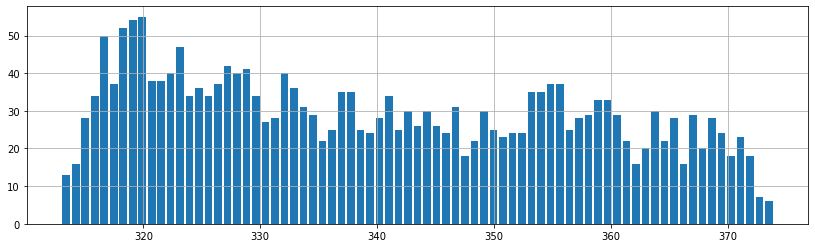

In [35]:
df_co2['co2'].hist(bins=75, rwidth=.8, figsize=(14,4))
df_co2['co2'].describe()

<AxesSubplot:>

count    2284.000000
mean     1979.614711
std        12.639115
min      1958.000000
25%      1969.000000
50%      1980.000000
75%      1991.000000
max      2001.000000
Name: Year, dtype: float64

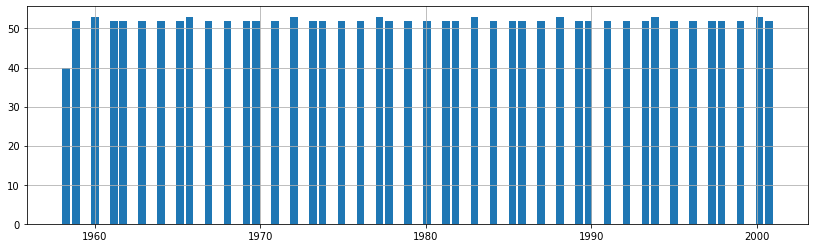

In [36]:
df_co2['Year'].hist(bins=75, rwidth=.8, figsize=(14,4))
df_co2['Year'].describe()

In [37]:
#Dropping Duplicates

before = df_co2.shape[0]
df_co2.drop_duplicates(inplace = True, keep = 'last')
rows_dropped = before - df_co2.shape[0]
print(str(rows_dropped) + ' ' + "duplicate rows dropped from the dataset")

0 duplicate rows dropped from the dataset


In [38]:
#Checking for missing values
print("Columns by % of missing values in descending order")
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending = False) *100/df_co2.shape[0]

Columns by % of missing values in descending order


co2    2.583187
dtype: float64

In [39]:
for col in categoricalfeatures:
    df_co2[col].fillna('none',inplace=True)

In [40]:
print("Columns by % of missing values in descending order")
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending = False) *100/df_co2.shape[0]

Columns by % of missing values in descending order


co2    2.583187
dtype: float64

<div class="alert alert-block alert-info">

# Hypothesis Testing

In [41]:
subsetd = df_co2[['co2', 'Year', 'Month']]

In [42]:
from scipy import stats
from scipy.stats import shapiro
series_2test = df_co2[['co2']]
stats, p = shapiro(series_2test)
print('stats=%.3f, p=%.3f' % (stats,p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stats=nan, p=1.000
Probably Gaussian


In [43]:
df_co2['co2'] = np.log(df_co2['co2'])


    
# A steady increase and occasional decrease of CO2 

<AxesSubplot:>

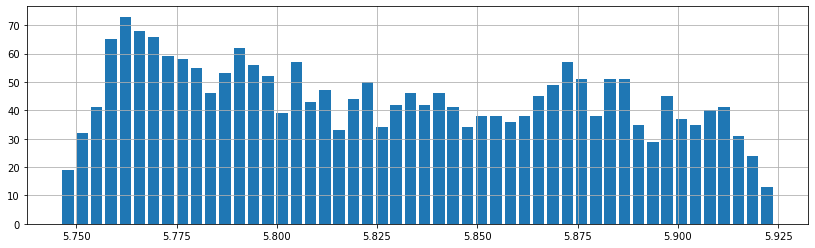

count    2225.000000
mean        5.828121
std         0.049800
min         5.746203
25%         5.783210
50%         5.823933
75%         5.871554
max         5.923988
Name: co2, dtype: float64

In [44]:
df_co2['co2'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_co2['co2'].describe()

In [45]:
df_co2.dtypes

co2                    float64
recordeddate    datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dtype: object

In [46]:
df_co2['Month'] = np.log(df_co2['Month'])

<AxesSubplot:>

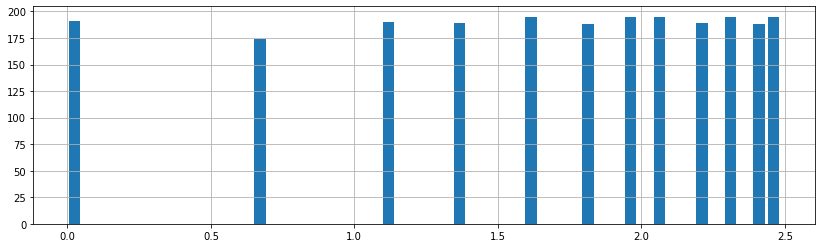

count    2284.000000
mean        1.675407
std         0.720941
min         0.000000
25%         1.386294
50%         1.945910
75%         2.302585
max         2.484907
Name: Month, dtype: float64

In [47]:
df_co2['Month'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_co2['Month'].describe()


<div class="alert alert-block alert-info">

# Seasonal Trend

# When displaying the seasonal trends, looking at the data yearly the rate of CO2 increases steadily over the span of 50 years.

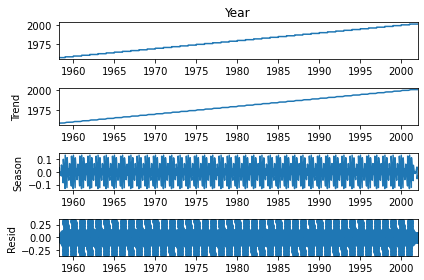

In [48]:
from statsmodels.tsa.seasonal import STL
stl = STL(pd.Series(df_co2.Year),period=12)
res = stl.fit()
fig = res.plot()

# However, the trends per month sees increases in the later months and decreases in the early months.

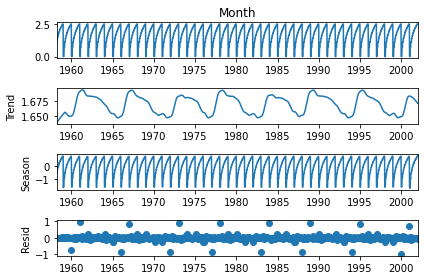

In [49]:
stl = STL(pd.Series(df_co2.Month),period=52)
res = stl.fit()
fig = res.plot()

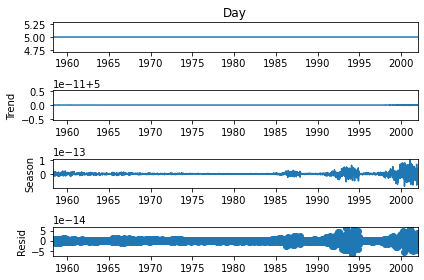

In [50]:
stl = STL(pd.Series(df_co2.Day),period=365)
res = stl.fit()
fig = res.plot()

<div class="alert alert-block alert-info">

# Time Series

In [51]:
df_co2.info()
df_co2.head()
df_co2.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
 2   Year          2284 non-null   int64         
 3   Month         2284 non-null   float64       
 4   Day           2284 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 107.1 KB


,co2,recordeddate,Year,Month,Day
1958-03-29,5.756059,1958-03-29,1958,1.098612,5
1958-04-05,5.759848,1958-04-05,1958,1.386294,5
1958-04-12,5.760793,1958-04-12,1958,1.386294,5
1958-04-19,5.760478,1958-04-19,1958,1.386294,5
1958-04-26,5.757007,1958-04-26,1958,1.386294,5


,co2,recordeddate,Year,Month,Day
2001-12-01,5.914313,2001-12-01,2001,2.484907,5
2001-12-08,5.915663,2001-12-08,2001,2.484907,5
2001-12-15,5.916741,2001-12-15,2001,2.484907,5
2001-12-22,5.917010,2001-12-22,2001,2.484907,5
2001-12-29,5.917549,2001-12-29,2001,2.484907,5


# Time series shows in years the rate of CO2 increases steadily from 1960-2000

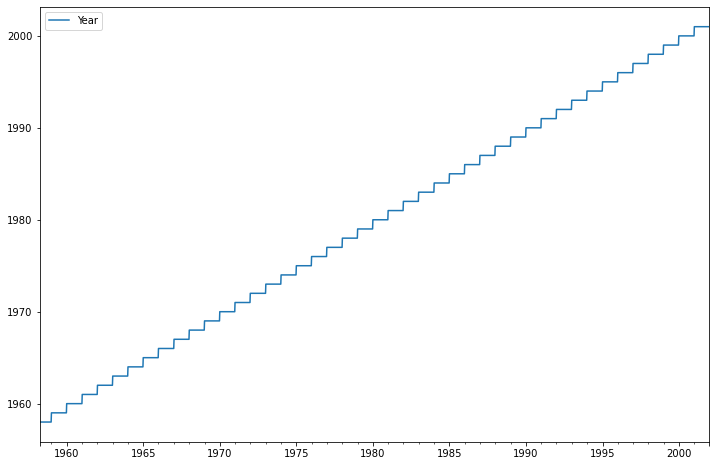

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
df_co2.Year.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

# However when you look at the rate in months, CO2 rate decreases and then increases

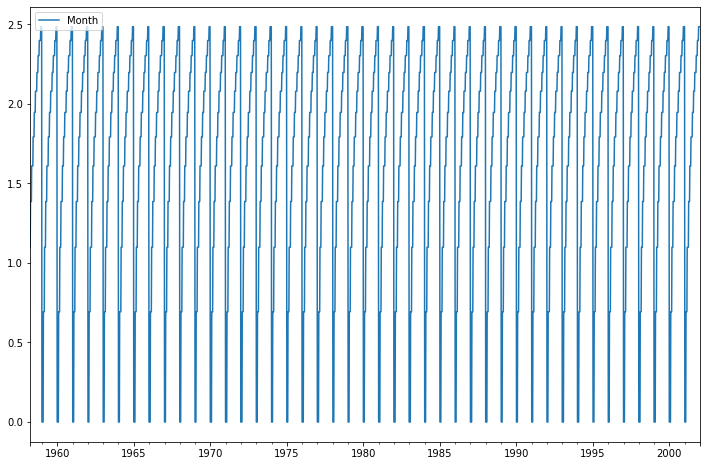

In [53]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
df_co2.Month.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

<div class="alert alert-block alert-info">

# Histograms 

# When looking at the histograms, the CO2 rate does in fact increase after April and then decreases towards the beginning of the next year to January.

<AxesSubplot:>

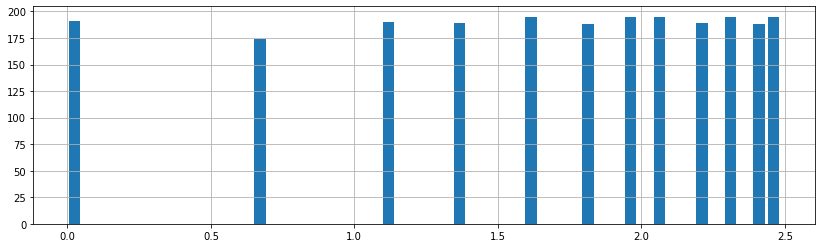

count    2284.000000
mean        1.675407
std         0.720941
min         0.000000
25%         1.386294
50%         1.945910
75%         2.302585
max         2.484907
Name: Month, dtype: float64

In [54]:
df_co2['Month'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_co2['Month'].describe()

# Data shows that each week, the co2 rate was recorded on Saturday. 

### NOTE: Although date says 5, when looking up the dates on the table it says Saturday

<AxesSubplot:>

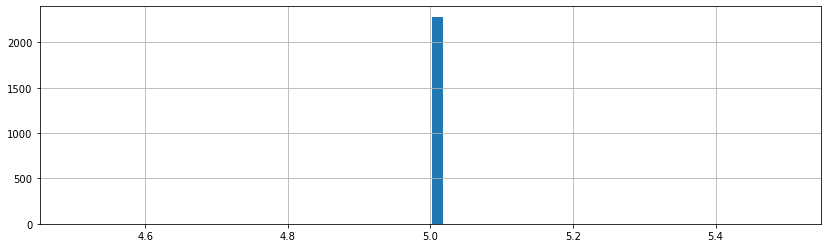

count    2284.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
Name: Day, dtype: float64

In [55]:
df_co2['Day'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_co2['Day'].describe()